<a href="https://colab.research.google.com/github/vicctoriia/ML_Churn/blob/main/Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CHURN MODELLING

O [*dataset*](https://www.kaggle.com/shubh0799/churn-modelling) escolhido trata sobre um problema clásssico: **Churn**. Isto é, uma checagem sobre a evasão (ou não) de clientes. Nesse caso, esse problema diz respeito a clientes de determinado banco. 

As variáveis do conjunto de dadoss são:

1.   **RowNumber:** número de linhas;
2.  **CustomerId:** Id do cliente;
3.   **Surname:** Sobrenome do cliente;
4.   **CreditScore:** pontuação de crédito baseada no histórico do cliente; 
5.  **Geography:** Localização do cliente (Espanha, Alemanha e França);
6.   **Gender:** Gênero (masculino ou feminino);
7.   **Tenure:** Tempo de vínculo do cliente com a empresa (suponho que esteja em anos);
8.  **Balance:** Montante em dinheiro (dólar) disponível na conta do cliente;
9.  **NumOfProducts:** Número de produtos da instituição que o cliente possui; 
10. **HasCrCard:** O cliente tem cartão de crédito, sim ou não?;
11. **IsActiveMember:** O cliente é um membro ativo, sim ou não?; 
12. **EstimatedSalary:** Salário estimado do cliente. 	






## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

## Carregando dados

In [2]:
gitds = 'https://raw.githubusercontent.com/vicctoriia/ML_Churn/main/Churn_Modelling.csv'
df = pd.read_csv(gitds)

## Análise exploratória dos dados

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [8]:
df.shape

(10000, 14)

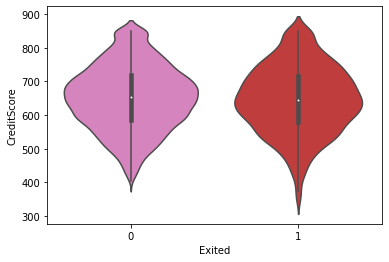

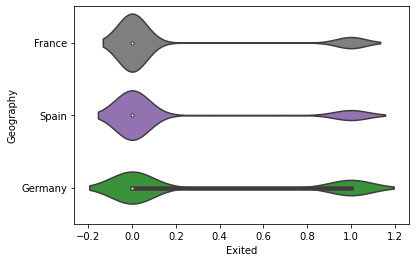

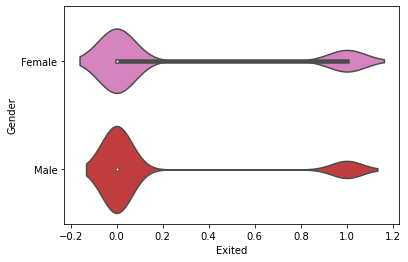

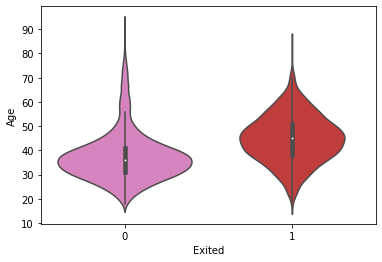

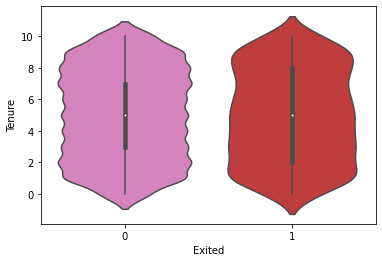

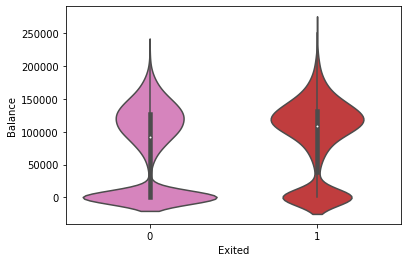

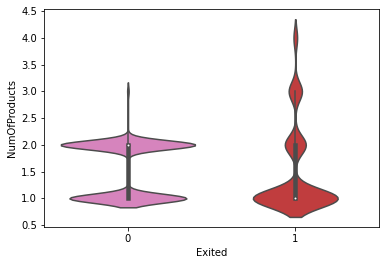

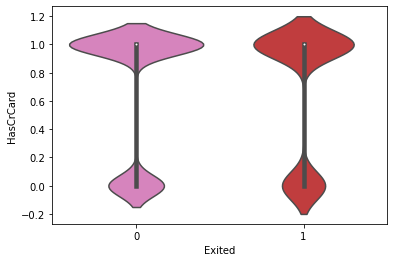

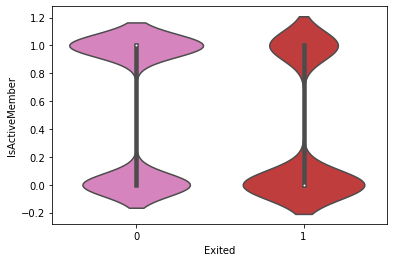

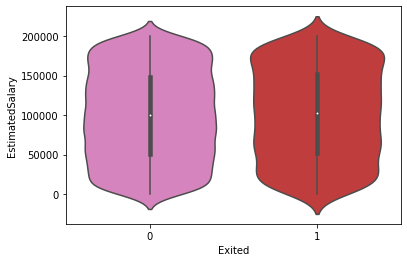

In [9]:
#Visualização das variáveis 
for i in df.columns[3:13]: 
  sns.violinplot(x='Exited', y= i, data = df, palette = 'tab10_r')
  plt.show()

In [10]:
corr = df.corr()
corr.style.background_gradient(cmap='PiYG')

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


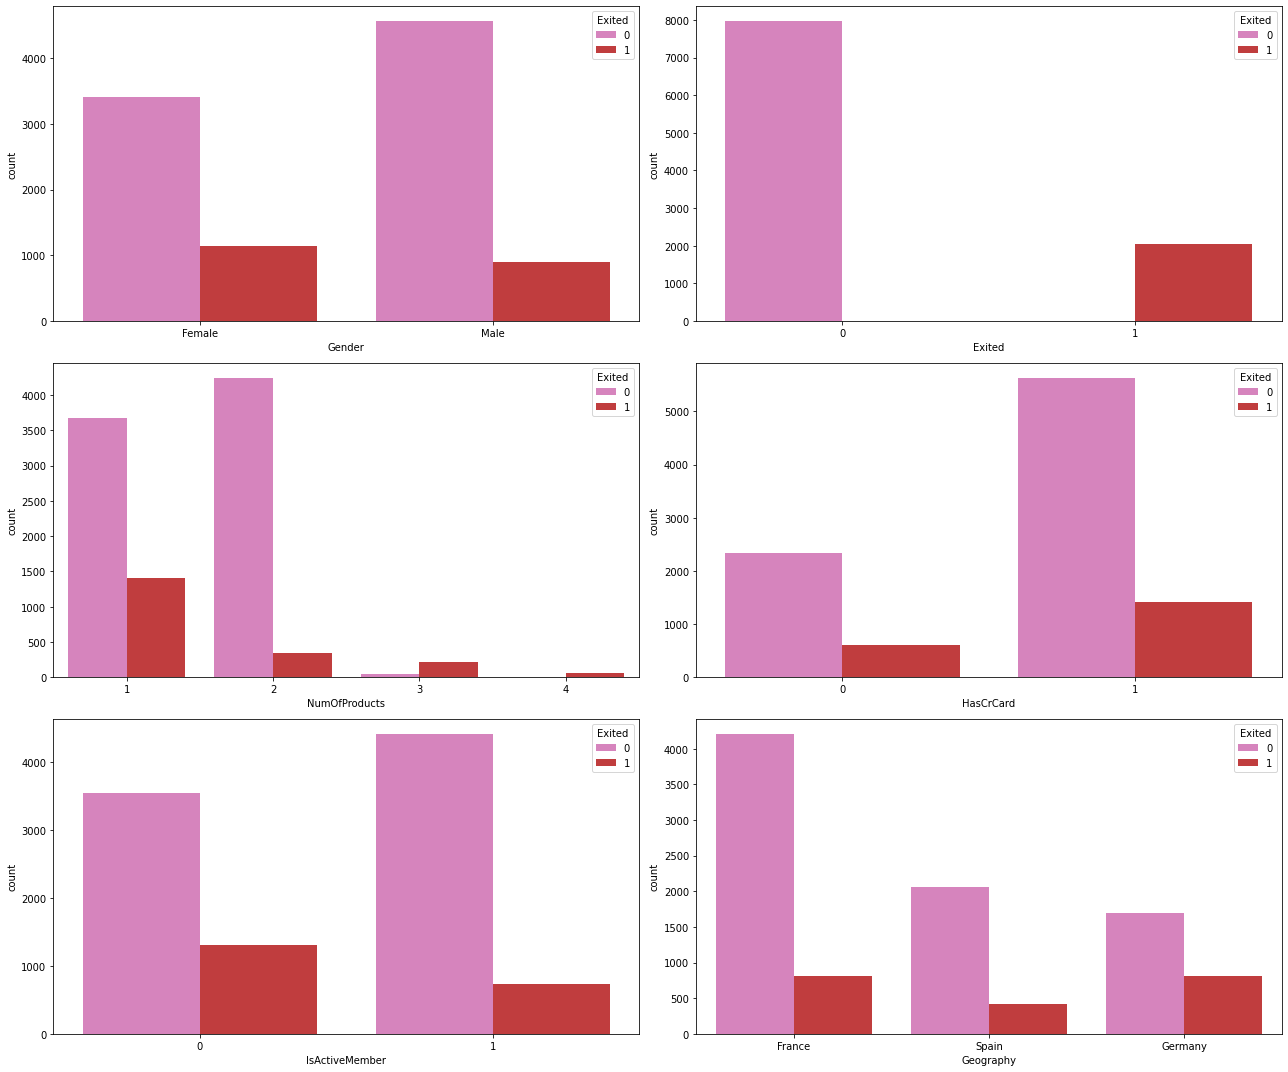

In [11]:
fig, ax = plt.subplots(3, 2, figsize = (18, 15))
sns.countplot(x= 'Gender', hue= 'Exited', data = df, palette = 'tab10_r', ax = ax[0][0])
sns.countplot(x= 'Exited', hue= 'Exited', data = df, palette = 'tab10_r', ax = ax[0][1])
sns.countplot(x= 'NumOfProducts', hue= 'Exited', data = df, palette = 'tab10_r', ax = ax[1][0])
sns.countplot(x= 'HasCrCard', hue= 'Exited', data = df, palette = 'tab10_r', ax = ax[1][1])
sns.countplot(x= 'IsActiveMember', hue= 'Exited', data = df, palette = 'tab10_r', ax = ax[2][0])
sns.countplot(x= 'Geography', hue= 'Exited', data = df, palette = 'tab10_r', ax = ax[2][1])


plt.tight_layout()
plt.show()

**Insights da análise exploratória:**


*   A proporção entre os clientes churn (20,37%) e não churn (79,63%) está desbalanceada; 
*   As mulheres estão evadindo mais que os homens; 
*  As pessoas que tem apenas um produto evadem mais que as que possuem mais de um; 
*  Os clientes da Alemanha estão evadindo mais que os da França e Espanha;
*  Os clientes com cartão de crédito estão evandindo mais **(mas quem não tem cartão de crédito hoje em dia?)**
*  O banco está perdendo clientes com valores elevados em conta corrente; 
*  Naturalmente, os clientes com conta inativa evadem mais; 
*  Os mais velhos estão evadindo mais que os mais novos **(curioso)**; 
*  Não noto multicolinearidade entre as variáveis; 
* Correlação positiva: Idade, saldo em conta e salário. 


## Pré-processamento de dados

In [12]:
df.drop(["CustomerId","Surname", 'RowNumber'], axis = 1, inplace = True) #descartando variáveis desnecessárias

In [13]:
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})  #transformando as variáveis Gênero e Localização em dummies
df = pd.get_dummies(df, columns=['Geography'])

In [14]:
df['Exited'].value_counts()  #precisa ser balanceado!  

0    7963
1    2037
Name: Exited, dtype: int64

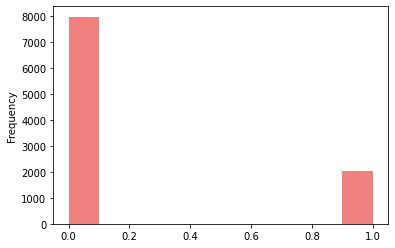

In [15]:
df['Exited'].plot(kind="hist", color = 'lightcoral') #visualização da variável target;

In [16]:
df['CreditScore'] = df['CreditScore']/1000 #escalando variável CreditScore

In [17]:
import numpy as np
mean = np.mean(df['Age'])
dp = np.std(df['Age'])

df['Age'] = (df['Age'] - mean)/dp #padronização (média 0 dp 1)

In [18]:
df['EstimatedSalary'] = df['EstimatedSalary']/100000 #escalando variável Salário

In [19]:
mean_balance = np.mean(df['Balance'])
dp_balance = np.std(df['Balance'])

df['Balance'] = (df['Balance'] - mean_balance)/dp_balance #padronização (média 0 dp 1)

In [20]:
df.head() #tudo na mesma escala! 

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.619,1,0.293517,2,-1.225848,1,1,1,1.013489,1,1,0,0
1,0.608,1,0.198164,1,0.117350,1,0,1,1.125426,0,0,0,1
2,0.502,1,0.293517,8,1.333053,3,1,0,1.139316,1,1,0,0
3,0.699,1,0.007457,1,-1.225848,2,0,0,0.938266,0,1,0,0
4,0.850,1,0.388871,2,0.785728,1,1,1,0.790841,0,0,0,1


## Machine Learning


## Importando bibliotecas

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier 


In [22]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_predict

In [23]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from imblearn.under_sampling import RandomUnderSampler

## Rodando modelos

In [24]:
X = df.drop('Exited', axis = 1) 
y = df['Exited']


In [26]:
lista_de_medidas = ['accuracy', 'recall', 'precision', 'balanced_accuracy', 'f1'] #métricas escolhidas
nome_das_medidas = ['acurácia', 'sensibilidade', 'precisão', 'eficiência', 'f1-score']


lista_de_modelos = [LogisticRegression(),    #modelos de classificação escolhidos 
                        DecisionTreeClassifier(max_depth = 3),   #montando algumas suposições sobre os algorítmos
                        DecisionTreeClassifier(max_depth = 5),
                        DecisionTreeClassifier(max_depth = 7),
                        KNeighborsClassifier(n_neighbors = 5),
                        KNeighborsClassifier(n_neighbors = 15),
                        KNeighborsClassifier(n_neighbors = 25),
                        BaggingClassifier(),
                        RandomForestClassifier(n_estimators=50, max_depth = 5),
                        RandomForestClassifier(n_estimators=50, max_depth = 7),
                        RandomForestClassifier(n_estimators=100, max_depth = 5),
                        RandomForestClassifier(n_estimators=100, max_depth = 7)]

nome_dos_modelos = ['Regressão Logística',
                        'Árvore (prof = 3)',
                        'Árvore (prof = 5)',
                        'Árvore (prof = 7)',
                        '5-NN',
                        '15-NN',
                        '25-NN',
                        'Bagging',
                        'Random Forest (arvs = 50, prof = 5)',
                        'Random Forest (arvs = 50, prof = 7)',
                        'Random Forest (arvs = 100, prof = 5)', 
                        'Random Forest (arvs = 100, prof = 7)']

resultados0 = {}

validacao = RepeatedStratifiedKFold(n_splits = 5, random_state= 42)  #escolha da validação "StratifiedKFold" porque a variável target (Exited) está desbalanceada!


for i in range(len(lista_de_modelos)):
    print('Modelo: ' + nome_dos_modelos[i])
    accs_vc = cross_validate(lista_de_modelos[i], X, y, cv = validacao, scoring = lista_de_medidas)

    acc = accs_vc['test_accuracy'].mean()
    sen = accs_vc['test_recall'].mean()
    vpp = accs_vc['test_precision'].mean()
    bac = accs_vc['test_balanced_accuracy'].mean()
    f1s = accs_vc['test_f1'].mean()

    resultados0[nome_dos_modelos[i]] = [acc, sen, vpp, bac, f1s]
    
resultados = pd.DataFrame(resultados0, index = nome_das_medidas).T

Modelo: Regressão Logística
Modelo: Árvore (prof = 3)
Modelo: Árvore (prof = 5)
Modelo: Árvore (prof = 7)
Modelo: 5-NN
Modelo: 15-NN
Modelo: 25-NN
Modelo: Bagging
Modelo: Random Forest (arvs = 50, prof = 5)
Modelo: Random Forest (arvs = 50, prof = 7)
Modelo: Random Forest (arvs = 100, prof = 5)
Modelo: Random Forest (arvs = 100, prof = 7)


In [27]:
resultados.sort_values(by = 'f1-score', ascending = False)

,acurácia,sensibilidade,precisão,eficiência,f1-score
Árvore (prof = 7),0.85442,0.462587,0.725565,0.708620,0.563621
Bagging,0.85029,0.464258,0.700425,0.706649,0.557978
Árvore (prof = 5),0.85409,0.425036,0.757222,0.694441,0.540917
"Random Forest (arvs = 100, prof = 7)",0.86041,0.400533,0.824080,0.689291,0.538599
"Random Forest (arvs = 50, prof = 7)",0.85989,0.399013,0.822559,0.688399,0.536565
5-NN,0.83174,0.384340,0.646609,0.665264,0.481815
15-NN,0.83825,0.323218,0.733950,0.646608,0.448470
"Random Forest (arvs = 50, prof = 5)",0.84791,0.302993,0.860076,0.645148,0.446894
"Random Forest (arvs = 100, prof = 5)",0.84758,0.300780,0.860622,0.644117,0.445123
25-NN,0.83544,0.288558,0.749861,0.631947,0.416363
